
# *Intelligence Artificielle et Jeux - ECM 2A*


# Résolution par exploration

### Plan

0. Guide sur les Notebook Python
1. Environnement de travail
2. Résolution de problèmes par exploration
3. Création d'une nouvelle classe de problème 
4. Accélération de la recherche avec des algorithmes informés

## 0. Introduction aux notebook

0. Guide sur les Notebook Python
1. Environnement de travail
2. Résolution de problèmes par exploration
3. Création d'une nouvelle classe de problème 
4. Accélération de la recherche avec des algorithmes informés

Aller voir une introduction rapide à http://dichotomies.fr/2015/informatique/info1/cours/debuter-avec-les-notebooks/

La syntaxe des cellules de commentaires (Markdown, comme cette cellule) est décrte ici : https://daringfireball.net/projects/markdown/syntax#list

NB : Avant de pouvoir utiliser l'environnemenr vous devez
- Télécharger l'archive 
- Mettre à jour la variable d'environnement PYTHONPATH pour inclure le répertoire racine du projet

Si vous avez déjà lancé *ipython notebook* interrompez le dans le terminal, mettez à jour PYTHONPATH puis relancez *ipython notebook* 

## 1. Environnement de travail

### Présentation de l'environnement de travail

#### Dans cette première partie vous  vous intéresserez aux répertoires et fichiers suivants  

*  Problems : 
 * Problems.py : définition générique de la classe Problem. Les instances de problèmes ne seront accesibles que via leurs méthodes publiques, qui redéfinissent les méthodes de la classe générique.

* Solvers : 
 * Solvers.py : fonctions de résolutions généiques pour résoudre tout problème instance de la classe Problem générique

* Chess : Tout le code concernant les échecs
 * ChessProblems.py : Un problème à résoudre lié aux échecs, le problème des huit reines
 
#### Vous aurez peut-être à vous intéresser à des fonctions utiles de gestion de listes FIFO ou LIFO (nommées FIFOQueue et Stack) dans le fichier utils.py du répertoire UTILE mais n'y allez voir que pour rechercher une classe ou une fonction.

### Utilisation de l'environnement chess

Pour le jeu d'échecs nous utiliserons les fonctions disponibles dans le package python-chess, décrit ici https://pypi.python.org/pypi/python-chess, et reprises en partie ci-dessous.

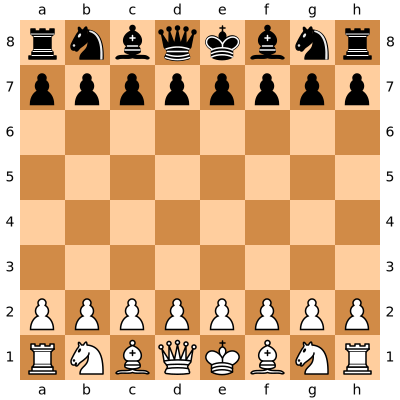

In [1]:
# Import et création d'un échiquier (avec les méthodes associées)

import chess

board = chess.Board()

board


In [26]:
# lister les coups légaux dans une position donnée

board.legal_moves


<LegalMoveGenerator at 0x7f77ac0a2cf8 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

g1f3


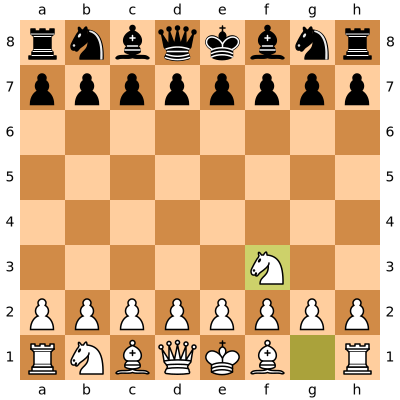

In [27]:
# Executer des coups

Nf3 = chess.Move.from_uci("g1f3")
print (Nf3)
board.push(Nf3)  # Make the move

board

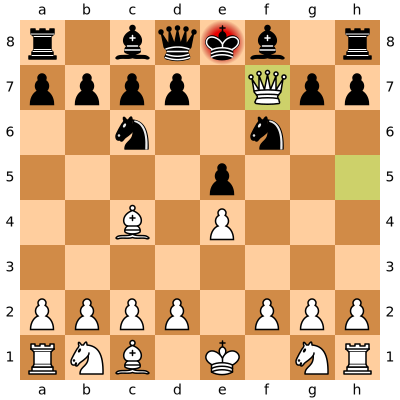

In [28]:
# Exécuter une série de coups. Notez qu'à chaque exécution le joueur courant tourne.

board = chess.Board()

board.push_san("e4")
board.push_san("e5")
board.push_san("Qh5")
board.push_san("Nc6")
board.push_san("Bc4")
board.push_san("Nf6")
board.push_san("Qxf7")

board.is_checkmate()

board


In [29]:
# Making moves


board = chess.Board()

print ("Avant de jouer le cavalier G1")
print (board)

Nf3 = chess.Move.from_uci("g1f3")
board.push(Nf3)  # Make the move

print ("Après avoir joué le cavalier G1")

print (board)
board.pop()  # Unmake the last move

print ("Après avoir annuler le coup")
print(board)



Avant de jouer le cavalier G1
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
Après avoir joué le cavalier G1
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R
Après avoir annuler le coup
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . p . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .


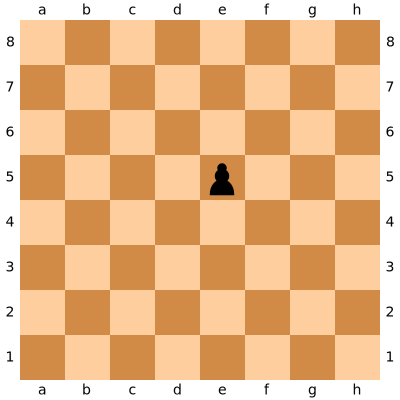

In [2]:
# Initialiser un échiquier avec une chaine de caractères

board = chess.Board("8/8/8/4p3/8/8/8/8 b KQkq - 0 4")
print(board)

board

In [9]:
#Detecting mate and so on

board.is_stalemate()
board.is_insufficient_material()

board.is_game_over()


False

#### To do

Initialisez (et affichez) un echiquier avec une seule pièce, un cavalier blanc en position "e4". 

### Utilisation de l'environnement NQueensProblem

In [2]:

from Problems.Problems import Problem

from Chess.ChessProblems import NQueensProblem

p= NQueensProblem(8)


#### Le problème des 8 reines utilise le codage de l'état de jeu (l'emplacement des reines placées) suivant. 

* Les numéros de ligne des reines sont codés dans un tableau de dimension 8 initialisé à None. 
 * Ainsi l'état initial est : [None, None, None, None, None, None, None, None]
 * Les numéros de colonne sont implicites. La première reine est de fait placée sur la 1ère colonne, la seconde sur la seconde etc. C'est pour cette raison que l'on ne stocke que le numero de ligne de chaune des reines.         
 * Voici le constructeur de la classe NQueensProblem :


    def __init__(self, N):
        self.N = N
        self.initial = [None] * N       

* L'algorithme de résolution cherche à placer la première reine puis la seconde puis la troisième etc





In [3]:
print (p.initial)

print ('successeurs de ', p.initial)

for e in p.successor(p.initial):
    print(e) 
    
s = p.successor(p.initial)[1][1] 

print ('successeurs de ', s)

for e in p.successor(s):
    print(e) 

[None, None, None, None, None, None, None, None]
successeurs de  [None, None, None, None, None, None, None, None]
(0, [0, None, None, None, None, None, None, None])
(1, [1, None, None, None, None, None, None, None])
(2, [2, None, None, None, None, None, None, None])
(3, [3, None, None, None, None, None, None, None])
(4, [4, None, None, None, None, None, None, None])
(5, [5, None, None, None, None, None, None, None])
(6, [6, None, None, None, None, None, None, None])
(7, [7, None, None, None, None, None, None, None])
successeurs de  [1, None, None, None, None, None, None, None]
(3, [1, 3, None, None, None, None, None, None])
(4, [1, 4, None, None, None, None, None, None])
(5, [1, 5, None, None, None, None, None, None])
(6, [1, 6, None, None, None, None, None, None])
(7, [1, 7, None, None, None, None, None, None])


## 2. To do : Résolution de problèmes par exploration

### 2.1. Ecriture des  codes de base

* Ecrivez les codes nécessaires pour résoudre le problème par exploration avec un parcours en profondeur d'abord et un parcours en largeur d'abord

Vious ecrirez des méthodes *depth_first_graph_search*, *breadth_first_graph_search* 

 **Le code vera être écrit dans le fichier Solver.py dans le répertoir Solvers. Le code doit être générique et n'utliser de l'instance de problème que ses méthodes publiques (voir Problems.py dans le répertoire Problems)** 

Les cellules suivantes doivent fonctionner lorsue vous aurez écrit votre code, en considérant que l'état d'un noeud encode l'emplacement des reines qui ont été placées, l'état final encodant donc les emplacements de toutes les reines.

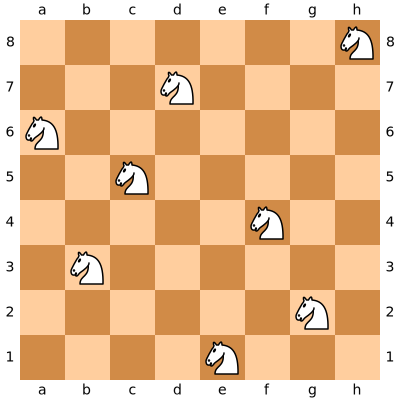

In [4]:

from Problems.Problems import Problem

from Chess.ChessProblems import NQueensProblem

from Solvers.Solvers import depth_first_graph_search, breadth_first_graph_search

p= NQueensProblem(8)
s = depth_first_graph_search(p)

p.display_solution(s)


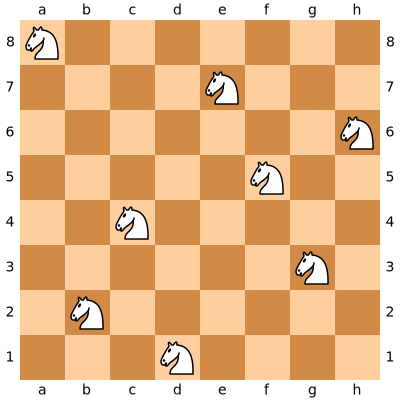

In [5]:
s = breadth_first_graph_search(p)
p.display_solution(s)

### 2.2. Analyse de la complexité

* Modifiez les codes de recherche pour obtenir non seulement une solution mais également le nombre de noeuds explorés pour l'atteindre.

* Comparez de ce point de vue de complexité algorithmique les algorithmes en largeur d'abord et en profondeur d'abord pour des problèmes de reines sur des échiquiers de taille allant de 8 à 20. Affichez la courbe de complexité des 3 méthodes en fonction de la taille du problème. 

## 3. To do : Création d'une nouvelle classe de problème 

### 3.1. Ecriture du code et premiers tests

* Ecrivez le code d'un nouveau problème, une nouvelle classe  *KnightProblem*, dans le fichier ChessProblems.py correspondant à un nouveau problème.
 * Il s'agit d'un problème de déplacement d'un cavalier. L'échiquier est initialement vide, le cavalier part d'une position initiale définie dans le problème et doit arriver dans une case finale qui est également définie dans le problème, en un nombre de coups minimal. 
 
 

* Testez vos méthodes de résolution sur ce nouveau problème. 

 => Le code suivant doit fonctionner, pourvu que vous ayez utiliser les mêmes noms de méthodes et de classe dans votre code.


In [ ]:

from Problems.Problems import Problem

from Chess.ChessProblems import NQueensProblem, KnightProblem

from Solvers.Solvers import depth_first_graph_search, breadth_first_graph_search

p  = KnightProblem()

s = depth_first_graph_search(p)

p.display_solution(s)

s = breadth_first_graph_search(p)

p.display_solution(s)

### 3.2. Comparaison des méthodes de recherche sur le problème du cavalier et améliorations 

* Comparez les deux méthodes en termes de longueur de la solution trouvée (nombre de coups joués) et de noeuds explorés. 
 
* Pour améliorer l'efficacité de la recherche vous pouvez utiliser une stratégie de recherche en profondeur limitée  itérative. Implémentez cette fonction de recherche et comparez là avec les deux autres méthodes déjà implémentées   
 

## 4. To do : Accélération de la recherche avec des algorithmes informés

### 4.1 Meilleur d'abord vorace 
Le Meilleur d'abord vorace utilise une heuristique pour accélérer la recherche. Implémentez cette fonction de recherche en utilisant une heuristique telle que la distance entre la position courante et la position cible. Testez et comparez cette fonction de recherche aux précédentes

### 4.2 L'algorithme A* 
L'algorithme A* utilise une heuristique également mais la combine au cout déjà accumulé dans le noeud. N'oubliez pas que l'heuristique que vous utilisez avec A* doit être une borne inférieure du cout réel, pour que les propriétés théoriques de cet algorithme soient garanties. Implémentez cet algorithme et comparez le aux autres algorithmes de recherche.  

